<a href="https://colab.research.google.com/github/edu23ard/Data-Science-ONE---desafio--/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de datos



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda['Tienda'] = 'Primera Tienda'
tienda2['Tienda'] = 'Segunda Tienda'
tienda3['Tienda'] = 'Trecera Tienda'
tienda4['Tienda'] = 'Cuarta Tienda'

tiendas_combinadas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Primera Tienda
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Primera Tienda
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Primera Tienda
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Primera Tienda
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Primera Tienda


#1. Análisis de facturación



In [98]:
# total de ingresos por tienda

def total_ingresos_por_tienda_combinada(df_combinado):
  if 'Precio' in df_combinado.columns and 'Tienda' in df_combinado.columns:
    ingresos_por_tienda = df_combinado.groupby('Tienda')['Precio'].sum()
    for tienda, total in ingresos_por_tienda.items():
      print(f"El total de ingresos en la {tienda} es de $ {total:,.2f}\n")
    return ingresos_por_tienda # Devuelve una Serie con los ingresos por tienda
  else:
    print("Error: El DataFrame debe contener las columnas 'Precio' y 'Tienda'.")
    return None

ingresos_totales_por_tienda = total_ingresos_por_tienda_combinada(tiendas_combinadas)


El total de ingresos en la Cuarta Tienda es de $ 1,038,375,700.00

El total de ingresos en la Primera Tienda es de $ 1,150,880,400.00

El total de ingresos en la Segunda Tienda es de $ 1,116,343,500.00

El total de ingresos en la Trecera Tienda es de $ 1,098,019,600.00



# 2. Ventas por categoría

In [99]:
# cantidad de produccto vendido por categoria


def cantidad_producto_vendido_por_categoria_con_nombre(df_tienda):
  if 'Categoría del Producto' in df_tienda.columns and 'Producto' in df_tienda.columns and 'Tienda' in df_tienda.columns:
    cantidad_por_categoria_por_tienda = df_tienda.groupby(['Categoría del Producto', 'Producto']).size().reset_index(name='Cantidad Vendida')
    nombre_tienda = df_tienda['Tienda'].iloc[0]
    print(f"\nCantidad de productos vendidos por categoría para la {nombre_tienda}:\n\n{cantidad_por_categoria_por_tienda}")
    print('-' * 75)
    return cantidad_por_categoria_por_tienda
  else:
    print("Error: El DataFrame debe contener las columnas 'Categoría del Producto', 'Producto' y 'Tienda'.")
    print('-' * 75)
    return None


primera_tienda_result = cantidad_producto_vendido_por_categoria_con_nombre(tienda)
segunda_tienda_result = cantidad_producto_vendido_por_categoria_con_nombre(tienda2)
tercera_tienda_result = cantidad_producto_vendido_por_categoria_con_nombre(tienda3)
cuarta_tienda_result = cantidad_producto_vendido_por_categoria_con_nombre(tienda4)



Cantidad de productos vendidos por categoría para la Primera Tienda:

     Categoría del Producto                     Producto  Cantidad Vendida
0   Artículos para el hogar                   Cubertería                52
1   Artículos para el hogar              Olla de presión                35
2   Artículos para el hogar                 Set de ollas                43
3   Artículos para el hogar                 Set de vasos                41
4      Deportes y diversión          Balón de baloncesto                55
5      Deportes y diversión            Balón de voleibol                42
6      Deportes y diversión                    Bicicleta                54
7      Deportes y diversión           Cuerda para saltar                40
8      Deportes y diversión                      Mochila                39
9      Deportes y diversión                 Vaso térmico                54
10        Electrodomésticos                       Estufa                45
11        Electrodomésticos  

In [ ]:
# cantidad de produccto vendido en tienda

def cantidad_producto_vendido(df_tienda):
  if 'Producto' in df_tienda.columns and 'Tienda' in df_tienda.columns:
    cantidad_por_producto = df_tienda['Producto'].value_counts()
    nombre_tienda = df_tienda['Tienda'].iloc[0]
    print(f"\nCantidad de veces que se vendió cada producto en la {nombre_tienda}:\n{cantidad_por_producto}")
    print('-' * 75)
    return cantidad_por_producto
  else:
    print("Error: El DataFrame debe contener las columnas 'Producto' y 'Tienda'.")
    print('-' * 75)
    return None

primera_tienda_result = cantidad_producto_vendido(tienda)
segunda_tienda_result = cantidad_producto_vendido(tienda2)
tercera_tienda_result = cantidad_producto_vendido(tienda3)
cuarta_tienda_result = cantidad_producto_vendido(tienda4)


# 3. Calificación promedio de la tienda


In [100]:
# valoracion media por tienda

def asignar_etiqueta(media):
    if media <= 1.5:
        return "Muy Mala"
    elif media <= 2.5:
        return "Mala"
    elif media <= 3.5:
        return "Regular"
    elif media <= 4.5:
        return "Buena"
    else:
        return "Excelente"

def valoracion_media_por_tienda(tienda, nombre_tienda):
  if 'Calificación' in tienda.columns:
    valoracion_media = tienda['Calificación'].mean().round(2)
    etiqueta = asignar_etiqueta(valoracion_media)
    print(f"La valoración media de la {nombre_tienda} es de: {valoracion_media} y su percepcion es {etiqueta}\n")

  else:
      print("La columna 'Calificación' no se encontró.")
      return None

primera_tienda = valoracion_media_por_tienda(tienda, 'Primera Tienda')
segunda_tienda = valoracion_media_por_tienda(tienda2, 'Segunda Tienda')
tercera_tienda = valoracion_media_por_tienda(tienda3, 'Tercera Tienda')
cuarta_tienda = valoracion_media_por_tienda(tienda4, 'Cuarta Tienda')

La valoración media de la Primera Tienda es de: 3.98 y su percepcion es Buena

La valoración media de la Segunda Tienda es de: 4.04 y su percepcion es Buena

La valoración media de la Tercera Tienda es de: 4.05 y su percepcion es Buena

La valoración media de la Cuarta Tienda es de: 4.0 y su percepcion es Buena



# 4. Productos más y menos vendidos

In [101]:
# Produccto mas vendidos y menos vendidos

def cantidad_producto_vendido(tienda):
    if 'Producto' in tienda.columns:
        cantidad_por_producto = tienda['Producto'].value_counts()
        #print("Cantidad de veces que se vendió cada producto:\n")
        return cantidad_por_producto
    else:
        print("La columna 'Producto' no se encontró.")
        return None


def producto_mas_vendido(tienda, nombre_tienda):
    cantidad_por_producto = cantidad_producto_vendido(tienda)

    print(f"\n--- Análisis de la Tienda: {nombre_tienda} ---")

    if cantidad_por_producto is not None and not cantidad_por_producto.empty:
        # Producto más vendido
        mayor_cantidad = cantidad_por_producto.max()
        productos_mas_vendidos = cantidad_por_producto[cantidad_por_producto == mayor_cantidad].index.tolist()
        if len(productos_mas_vendidos) == 1:
            print(f"Producto más vendido: {productos_mas_vendidos[0]} (Cantidad: {mayor_cantidad})")
        else:
            print(f"Los productos más vendidos: {', '.join(productos_mas_vendidos)} (Cantidad: {mayor_cantidad})")

        # Producto menos vendido
        menor_cantidad = cantidad_por_producto.min()
        productos_menos_vendidos = cantidad_por_producto[cantidad_por_producto == menor_cantidad].index.tolist()
        if len(productos_menos_vendidos) == 1:
            print(f"Producto menos vendido: {productos_menos_vendidos[0]} (Cantidad: {menor_cantidad})")
        else:
            print(f"Los productos menos vendidos: {', '.join(productos_menos_vendidos)} (Cantidad: {menor_cantidad})")
    else:
        print("No hay datos de ventas de productos para analizar.")

numero_tienda = ['Primera Tienda', 'Segunda Tienda', 'Tercera Tienda', 'Cuarta Tienda']

producto_mas_vendido(tienda, numero_tienda[0])
print('-' * 75)
producto_mas_vendido(tienda2, numero_tienda[1])
print('-' * 75)
producto_mas_vendido(tienda3, numero_tienda[2])
print('-' * 75)
producto_mas_vendido(tienda4, numero_tienda[3])


--- Análisis de la Tienda: Primera Tienda ---
Los productos más vendidos: Microondas, TV LED UHD 4K, Armario (Cantidad: 60)
Los productos menos vendidos: Auriculares con micrófono, Celular ABXY (Cantidad: 33)
---------------------------------------------------------------------------

--- Análisis de la Tienda: Segunda Tienda ---
Producto más vendido: Iniciando en programación (Cantidad: 65)
Producto menos vendido: Juego de mesa (Cantidad: 32)
---------------------------------------------------------------------------

--- Análisis de la Tienda: Tercera Tienda ---
Producto más vendido: Kit de bancas (Cantidad: 57)
Producto menos vendido: Bloques de construcción (Cantidad: 35)
---------------------------------------------------------------------------

--- Análisis de la Tienda: Cuarta Tienda ---
Producto más vendido: Cama box (Cantidad: 62)
Producto menos vendido: Guitarra eléctrica (Cantidad: 33)


# 5. Envío promedio por tienda

In [102]:
# valor del envio promedio por tienda

def costo_envio_media_tienda(tienda,numero_tienda):

  costo_envio_media_por_tienda = tienda['Costo de envío'].mean()

  print(f"El costo promedio de envio para la {numero_tienda} es de :\n${costo_envio_media_por_tienda:,.2f}")

primera_tienda = costo_envio_media_tienda(tienda,numero_tienda[0])
print('-' * 75)
segunda_tienda = costo_envio_media_tienda(tienda2,numero_tienda[1])
print('-' * 75)
trecera_tienda = costo_envio_media_tienda(tienda3,numero_tienda[2])
print('-' * 75)
cuarta_tienda = costo_envio_media_tienda(tienda4,numero_tienda[3])

El costo promedio de envio para la Primera Tienda es de :
$26,018.61
---------------------------------------------------------------------------
El costo promedio de envio para la Segunda Tienda es de :
$25,216.24
---------------------------------------------------------------------------
El costo promedio de envio para la Tercera Tienda es de :
$24,805.68
---------------------------------------------------------------------------
El costo promedio de envio para la Cuarta Tienda es de :
$23,459.46


# **GRAFICOS**


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## 1. Valoracion media por tienda

In [ ]:
# 1. Valoracion media por tienda


plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 7))

colores = ['#4A7C59', '#F4A261', '#E76F51', '#2A9D8F']
barras = ax.bar(tiendas, valoraciones_medias, color=colores, alpha=0.9, edgecolor='black', linewidth=1.5)

ax.set_title('Valoración Media por Tienda', fontsize=20, fontweight='bold', color='black', pad=20)
ax.set_xlabel('Tienda', fontsize=14, color='dimgray')
ax.set_ylabel('Valoración Media', fontsize=14, color='dimgray')
ax.set_ylim(0, 5.2)

for barra in barras:
    yval = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, yval + 0.15,
            round(yval, 2), ha='center', va='bottom', fontsize=12,
            fontweight='bold', color='black')

ax.grid(axis='y', linestyle='--', alpha=0.6, color='lightgray')
plt.xticks(rotation=0, fontsize=12, color='dimgray')
plt.yticks(fontsize=12, color='dimgray')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

## 2. Producctos mas y menos vendidos en las cuatro tiendas

In [ ]:
# Gráfico para la Primera Tienda
cantidad_por_producto1 = tienda['Producto'].value_counts()
mas_vendido1 = cantidad_por_producto1.idxmax()
menos_vendido1 = cantidad_por_producto1.idxmin()
datos1 = [cantidad_por_producto1[mas_vendido1], cantidad_por_producto1[menos_vendido1]]
etiquetas1 = [f'Más Vendido:\n{mas_vendido1}', f'Menos Vendido:\n{menos_vendido1}']

plt.figure(figsize=(10, 5))
barras = plt.barh(etiquetas1, datos1, color=['#4A90E2', '#FF6347'])
plt.title('Primera Tienda - Productos Más y Menos Vendidos', fontsize=15, fontweight='bold')
plt.xlabel('') # Quitamos la etiqueta del eje X

# Agregar etiquetas de valor y anotaciones
for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f' {ancho}', va='center', ha='left', fontsize=12, fontweight='bold')
    plt.plot(ancho, barra.get_y() + barra.get_height()/2, 'o', color='black', markersize=5)
    plt.annotate('', xy=(ancho, barra.get_y() + barra.get_height()/2), xytext=(ancho-1, barra.get_y() + barra.get_height()/2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 horizontalalignment='right')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico para la Segunda Tienda
cantidad_por_producto2 = tienda2['Producto'].value_counts()
mas_vendido2 = cantidad_por_producto2.idxmax()
menos_vendido2 = cantidad_por_producto2.idxmin()
datos2 = [cantidad_por_producto2[mas_vendido2], cantidad_por_producto2[menos_vendido2]]
etiquetas2 = [f'Más Vendido:\n{mas_vendido2}', f'Menos Vendido:\n{menos_vendido2}']

plt.figure(figsize=(10, 5))
barras = plt.barh(etiquetas2, datos2, color=['#4A90E2', '#FF6347'])
plt.title('Segunda Tienda - Productos Más y Menos Vendidos', fontsize=15, fontweight='bold')
plt.xlabel('')

for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f' {ancho}', va='center', ha='left', fontsize=12, fontweight='bold')
    plt.plot(ancho, barra.get_y() + barra.get_height()/2, 'o', color='black', markersize=5)
    plt.annotate('', xy=(ancho, barra.get_y() + barra.get_height()/2), xytext=(ancho-1, barra.get_y() + barra.get_height()/2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 horizontalalignment='right')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico para la Tercera Tienda
cantidad_por_producto3 = tienda3['Producto'].value_counts()
mas_vendido3 = cantidad_por_producto3.idxmax()
menos_vendido3 = cantidad_por_producto3.idxmin()
datos3 = [cantidad_por_producto3[mas_vendido3], cantidad_por_producto3[menos_vendido3]]
etiquetas3 = [f'Más Vendido:\n{mas_vendido3}', f'Menos Vendido:\n{menos_vendido3}']

plt.figure(figsize=(10, 5))
barras = plt.barh(etiquetas3, datos3, color=['#4A90E2', '#FF6347'])
plt.title('Tercera Tienda - Productos Más y Menos Vendidos', fontsize=15, fontweight='bold')
plt.xlabel('')

for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f' {ancho}', va='center', ha='left', fontsize=12, fontweight='bold')
    plt.plot(ancho, barra.get_y() + barra.get_height()/2, 'o', color='black', markersize=5)
    plt.annotate('', xy=(ancho, barra.get_y() + barra.get_height()/2), xytext=(ancho-1, barra.get_y() + barra.get_height()/2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 horizontalalignment='right')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Gráfico para la Cuarta Tienda
cantidad_por_producto4 = tienda4['Producto'].value_counts()
mas_vendido4 = cantidad_por_producto4.idxmax()
menos_vendido4 = cantidad_por_producto4.idxmin()
datos4 = [cantidad_por_producto4[mas_vendido4], cantidad_por_producto4[menos_vendido4]]
etiquetas4 = [f'Más Vendido:\n{mas_vendido4}', f'Menos Vendido:\n{menos_vendido4}']

plt.figure(figsize=(10, 5))
barras = plt.barh(etiquetas4, datos4, color=['#4A90E2', '#FF6347'])
plt.title('Cuarta Tienda - Productos Más y Menos Vendidos', fontsize=15, fontweight='bold')
plt.xlabel('')

for barra in barras:
    ancho = barra.get_width()
    plt.text(ancho, barra.get_y() + barra.get_height()/2, f' {ancho}', va='center', ha='left', fontsize=12, fontweight='bold')
    plt.plot(ancho, barra.get_y() + barra.get_height()/2, 'o', color='black', markersize=5)
    plt.annotate('', xy=(ancho, barra.get_y() + barra.get_height()/2), xytext=(ancho-1, barra.get_y() + barra.get_height()/2),
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                 horizontalalignment='right')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 3. Ventas de productos por categoria en cada tienda

In [95]:
fig = px.treemap(
    tiendas_combinadas,
    path=[px.Constant("Todas las Tiendas"), 'Tienda', 'Categoría del Producto', 'Producto'],
    values='Precio',
    color='Precio',
    color_continuous_scale='Viridis'
)

fig.update_layout(title_text='Ventas de Productos por Categoría y Tienda',
                  font=dict(size=14))
fig.show()

## 4. Total de ingresos de cada tienda

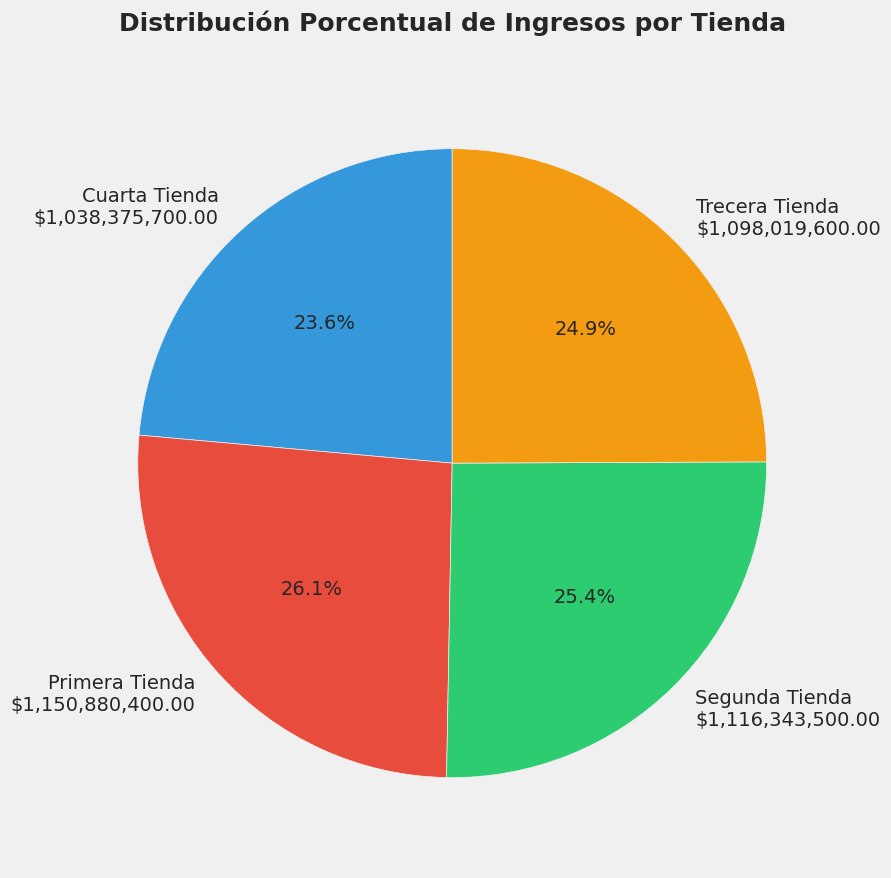

In [96]:
def total_ingresos_por_tienda_combinada(df_combinado):
  if 'Precio' in df_combinado.columns and 'Tienda' in df_combinado.columns:
    ingresos_por_tienda = df_combinado.groupby('Tienda')['Precio'].sum()
    return ingresos_por_tienda
  else:
    return None

ingresos_totales_por_tienda = total_ingresos_por_tienda_combinada(tiendas_combinadas)

# Creación del gráfico de pastel
if ingresos_totales_por_tienda is not None:
    plt.figure(figsize=(9, 9))
    colores = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
    plt.pie(
        ingresos_totales_por_tienda,
        labels=[f'{tienda}\n${valor:,.2f}' for tienda, valor in ingresos_totales_por_tienda.items()],
        autopct='%1.1f%%',
        colors=colores,
        startangle=90
    )
    plt.title('Distribución Porcentual de Ingresos por Tienda', fontsize=18, fontweight='bold', pad=20)
    plt.ylabel('') # Quitar la etiqueta del eje Y
    plt.axis('equal')  # Asegurar que el círculo sea perfecto
    plt.tight_layout()
    plt.show()



# Informe final



## Introducción
Este informe tiene como objetivo principal determinar cuál de las cuatro tiendas bajo análisis debería ser considerada para una posible venta. Para tomar esta decisión, se han evaluado diversos factores de rendimiento, incluyendo los ingresos totales, las categorías de productos más y menos vendidos, las calificaciones promedio de los clientes y el costo promedio de envío por tienda. El análisis busca identificar la tienda con el desempeño más débil en relación a las demás, considerando tanto sus fortalezas como sus debilidades.

## Análisis y Presentación de Datos

### 1. Ingresos Totales
Los ingresos totales son el primer indicador clave para evaluar el rendimiento de cada tienda. A continuación, se presenta un resumen de los ingresos por tienda:

Primera Tienda: $1,150,880,400.00

Segunda Tienda: $1,116,343,500.00

Tercera Tienda: $1,098,019,600.00

Cuarta Tienda: $1,038,375,700.00

Como se puede observar, la Cuarta Tienda presenta el menor nivel de ingresos totales. A pesar de que las diferencias no son extremas, este factor la sitúa en la última posición en términos de generación de capital. La Primera Tienda, en contraste, muestra un desempeño superior en este aspecto, generando el mayor ingreso de todas.

### 2. Calificaciones Promedio de Clientes
Las calificaciones de los clientes reflejan la satisfacción y la calidad percibida del servicio y los productos. Todas las tiendas tienen una percepción de "Buena" en general, con las siguientes calificaciones promedio:

Primera Tienda: 3.98

Segunda Tienda: 4.04

Tercera Tienda: 4.05

Cuarta Tienda: 4.0

En este análisis, la Primera Tienda tiene la calificación promedio más baja, lo que sugiere un área de oportunidad para mejorar la experiencia del cliente. La Tercera Tienda, por su parte, destaca con la calificación más alta, lo que indica un fuerte nivel de satisfacción.

### 3. Costo Promedio de Envío
El costo de envío es un factor importante que afecta la rentabilidad de las operaciones. Un menor costo de envío es preferible, ya que optimiza los gastos operativos.

Primera Tienda: $26,018.61

Segunda Tienda: $25,216.24

Tercera Tienda: $24,805.68

Cuarta Tienda: $23,459.46

La Primera Tienda enfrenta el costo promedio de envío más alto, lo que podría impactar negativamente en su rentabilidad a largo plazo. En contraste, la Cuarta Tienda se beneficia del costo de envío más bajo, lo que demuestra una mayor eficiencia en su logística.

### 4. Productos Más y Menos Vendidos en cada tienda
El análisis de productos revela las fortalezas y debilidades de cada tienda en términos de su inventario y la demanda de sus productos.










**Primera Tienda**
Productos más vendidos: Microondas, TV LED UHD 4K, y Armario, con 60 unidades vendidas cada uno. Esto indica una fuerte demanda en las categorías de electrodomésticos y muebles.

Productos menos vendidos: Auriculares con micrófono y Celular ABXY, con solo 33 unidades cada uno. Esto sugiere un bajo rendimiento en la categoría de electrónica personal.

Fortaleza: Alto volumen de ventas en productos de alto valor como TV y electrodomésticos.

Debilidad: Baja demanda en productos de electrónica personal.

**Segunda Tienda**
Producto más vendido: "Iniciando en programación" (65 unidades). Esto muestra un nicho fuerte en la categoría de libros y educación.

Producto menos vendido: Juego de mesa (32 unidades). Esto sugiere una baja demanda en la categoría de entretenimiento y ocio.

Fortaleza: Liderazgo en el nicho de libros de programación, lo que podría atraer a un público especializado.

Debilidad: El bajo rendimiento en la venta de juegos de mesa puede indicar una falta de diversificación en su oferta de entretenimiento.

**Tercera Tienda**
Producto más vendido: Kit de bancas (57 unidades). Las ventas se concentran en productos para el hogar y mobiliario.

Producto menos vendido: Bloques de construcción (35 unidades). Esto indica una demanda débil en la categoría de juguetes.

Fortaleza: Fuerte desempeño en productos para el hogar.

Debilidad: Baja penetración en el mercado de juguetes.

**Cuarta Tienda**
Producto más vendido: Cama box (62 unidades), lo que la posiciona como líder en ventas de muebles.

Producto menos vendido: Guitarra eléctrica (33 unidades). Esto demuestra una demanda muy baja en la categoría de instrumentos musicales.

Fortaleza: Liderazgo en ventas de camas y mobiliario.

Debilidad: Ausencia de mercado para la categoría de instrumentos musicales.

## Conclusión y Recomendación
Después de analizar los factores de rendimiento de cada tienda, se mantiene la recomendación de vender la **Cuarta Tienda**. Aunque esta tienda presenta el costo promedio de envío más bajo, lo que es una fortaleza significativa, es la que tiene el rendimiento más débil en los otros aspectos clave del negocio.

### Justificación de la Decisión:

**Menor Generación de Ingresos:** La Cuarta Tienda tiene los ingresos totales más bajos de las cuatro. Este es un indicador crítico de su rendimiento general y la sitúa en la última posición en términos de rentabilidad.

**Rendimiento en Venta de Productos:** El análisis detallado de ventas por producto revela que, a pesar de tener un producto estrella (Cama box), el rendimiento general es desigual. La venta de productos como la Guitarra eléctrica es significativamente baja (33 unidades), lo que indica que algunas de sus categorías de productos no son rentables y podrían estar afectando la salud financiera de la tienda.

**Comparación con la Primera Tienda:** Si bien la Primera Tienda también tiene productos menos vendidos (Celular ABXY y Auriculares con micrófono con 33 unidades cada uno), su volumen de ventas total es mucho mayor, y sus productos estrella tienen una demanda muy alta (Microondas, TV LED UHD 4K y Armario con 60 unidades cada uno), lo que justifica sus mayores ingresos a pesar de tener el costo de envío más alto.

**En resumen, la combinación de bajos ingresos y la falta de un rendimiento equilibrado en todas las categorías de productos hacen que la Cuarta Tienda sea la candidata más adecuada para una venta. Esto permitiría a la empresa concentrar sus recursos y esfuerzos en las otras tres tiendas, que muestran un rendimiento superior y una mayor estabilidad financiera.**

# ¡Extra! Análisis del desempeño geográfico

In [8]:
import folium
from folium.plugins import HeatMap

In [7]:

lat_promedio = tiendas_combinadas['lat'].mean()
lon_promedio = tiendas_combinadas['lon'].mean()
m = folium.Map(location=[lat_promedio, lon_promedio], zoom_start=10)


tiendas = tiendas_combinadas['Tienda'].unique()

for tienda in tiendas:
    df_tienda = tiendas_combinadas[tiendas_combinadas['Tienda'] == tienda]
    datos_tienda = df_tienda[['lat', 'lon']].values.tolist()
    fg = folium.FeatureGroup(name=f'Ventas de {tienda}')
    HeatMap(datos_tienda).add_to(fg)
    fg.add_to(m)

folium.LayerControl().add_to(m)

m